# Project 0

## Defining the funcitons

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.linalg


In [2]:
def eulerstep(A, uold, h):
    y_prim = A@uold  # y_prim = A*uold
    unew = uold + y_prim*h
    return unew

In [3]:
def eulerint(A, y0, t0, tf, N):
    y_new =  y0 #first step
    h = (tf-t0)/N #step size
    tgrid = np.linspace(t0, tf, N+1) #time grid
    approx = np.zeros((N+1, len(y0))) #approximation
    exact = np.zeros((N+1, len(y0))) #exact solution
    approx[0] = y0 #initial condition
    exact[0] = y0 #initial condition
    for i in range(N):
        y_new = eulerstep(A, y_new, h) 
        approx[i+1] = y_new
        exact[i+1] = scipy.linalg.expm(tgrid[i+1]*A)@y0
    err = exact-approx
    return tgrid, exact, approx, err

In [4]:
def errVSh(A, y0, t0, tf): 
   h_values= []
   error_values= []

   k=4
   for N in range(1, 2**k):
        h=(tf-t0)/N
        err=  eulerint(A, y0, t0, tf, N)[3]
        h_values.append(h)
        error_values.append(np.linalg.norm(err[-1]))         
   return h_values, error_values
   

In [5]:
def errVSh2(A, y0, t0, tf): 
   t=[]
   error_values= []
   N=100
   h=t0 + (tf-t0)/N

   for i in range(1, N):
        current_time=i*h
        err=  eulerint(A, y0, t0, current_time, N)[3]
        t.append(current_time)
        error_values.append(err[-1])

   return t, error_values


## Input data

In [6]:
#Input data
A=np.array([[2]])
y0 = np.array([1])
t0 = 0
tf = 4
N = 100

## Testing the functions

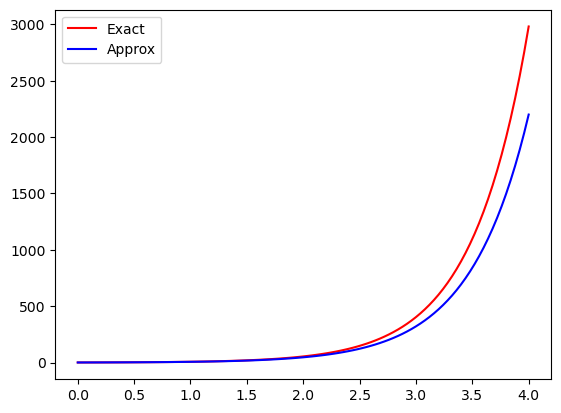

In [7]:
#Plotting the approximation and exact solution
result= eulerint(A, y0, t0, tf, N)
for i in range(len(y0)):
    plt.plot(result[0], result[1][:,i], 'r', label='Exact')
    plt.plot(result[0], result[2], 'b', label='Approx')
    plt.legend()
    plt.show()

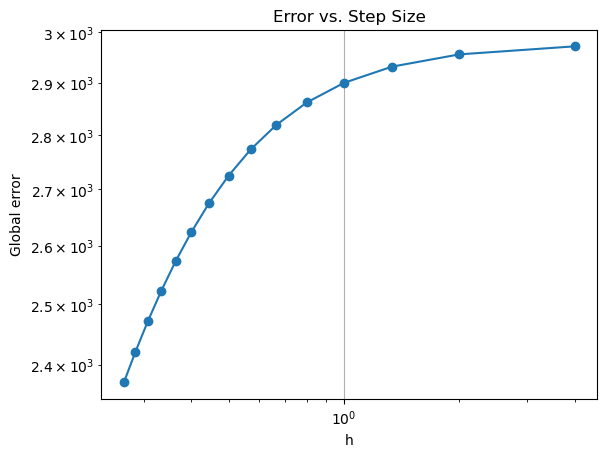

In [8]:
#Plotting the global error of different N 
results=errVSh(A, y0, t0, tf)
plt.loglog(results[0], results[1], marker='o', label='Global error')
plt.xlabel('h')
plt.ylabel('Global error')
plt.title("Error vs. Step Size")
plt.grid(True)

Text(0.5, 1.0, 'Error vs. Time')

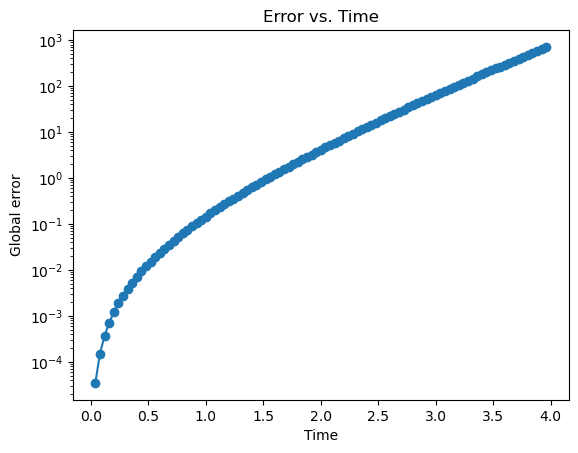

In [9]:
#Plotting the error dependent on time 
results=errVSh2(A, y0, t0, tf)
plt.semilogy(results[0], results[1], marker='o', label='Global error')
plt.xlabel('Time')
plt.ylabel('Global error')
plt.title("Error vs. Time")
